<a href="https://colab.research.google.com/github/skywalker0803r/Wastewater-Biological-Treatment/blob/main/Observation_time_delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
drive.mount('/content/drive')
path = '/content/drive/MyDrive/專案工作承攬契約書_廢水生物處理/20210101-20220831資料(品管數據Event)-20220928.xlsx'

Mounted at /content/drive


In [2]:
df = pd.read_excel(path,index_col=0)
對應表 = df.iloc[1:3,:]
對應表.index = ['中文名稱','英文名稱']
對應表.T

,中文名稱,英文名稱
Input,T752入料量,PHL-WS-FI7C01_PV
Output,T752溶氧,PHL-WS-AT7C03_PV
Input.1,T752導電度計,PHL-WS-AT7C02_PV
Input.2,T752溫度,PHL-WS-TT7C09_PV
Input.3,T752 液位,PHL-WS-T752-LEVEL_PV
Input.4,T752曝氣量,PHL-WS-FIT7C04_PV
Output.1,放流水量,PHL-WS-FI7E01_PV
Input.5,T752排泥量,PHL-WS-FI7C05_PV
Input.6,T-752食微比,T-752食微比
Input.7,T751COD濃度,PHL_T751-COD_ppm


In [3]:
df.columns = 對應表.T['英文名稱'].values.tolist()
df = df.iloc[3:,:]
# to_datetime
df.index = pd.to_datetime(df.index)
# to_numeric
for i in df.columns:
  df[i] = pd.to_numeric(df[i],errors='coerce')
df

,PHL-WS-FI7C01_PV,PHL-WS-AT7C03_PV,PHL-WS-AT7C02_PV,PHL-WS-TT7C09_PV,PHL-WS-T752-LEVEL_PV,PHL-WS-FIT7C04_PV,PHL-WS-FI7E01_PV,PHL-WS-FI7C05_PV,T-752食微比,PHL_T751-COD_ppm,...,PHL_A771-SS,PHL_A771-PHL,PHL_S7511-PO4,PHL_S7512-PO4,PHL_S7511-NH3,PHL_S7512-NH3,PHL_T751-pH,PHL_S7512-pH,PHL_A771-pH,PHL_S7512-SS
2021-01-01 00:00:00,30.833108,3.286289,13455.781850,30.917607,82.792742,NaN,153.078133,7.775581,NaN,NaN,...,13.0,NaN,21.6,2.46,NaN,NaN,7.7,8.1,8.4,29.0
2021-01-01 00:30:00,30.824920,3.249190,13544.369006,30.906732,82.794224,NaN,152.691545,7.801781,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 01:00:00,30.817218,3.212090,13692.186663,30.896172,82.795705,NaN,152.547371,8.441985,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 01:30:00,30.809515,3.174991,13524.119119,30.885612,82.797186,NaN,152.464886,7.955894,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 02:00:00,30.801812,3.137892,13564.085671,30.875052,82.798668,NaN,152.925640,7.796114,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 21:30:00,35.768714,2.940454,13319.257346,37.123735,82.623431,1159.716954,173.315093,4.940935,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-31 22:00:00,35.998689,2.926293,13170.528166,37.127622,82.615112,1153.971186,171.440216,4.914889,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-31 22:30:00,35.954481,2.913440,13191.728676,37.136033,82.607325,1150.363080,165.378326,4.901071,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-31 23:00:00,35.887392,2.920160,13267.031345,37.133538,82.613535,1149.097798,167.871083,4.828498,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
x_col = [
    'PHL-WS-AT7C02_PV',#導電度
    'PHL-WS-TT7C09_PV',#溫度
    'PHL-WS-T752-LEVEL_PV',#液位
    'PHL-WS-FIT7C04_PV',#曝氣量
    'PHL-WS-FI7C05_PV',#排泥量
    'PHL_T752-MLSS',#MLSS
    'T-752食微比'#食微比
    ]
y_col = [
    'PHL-WS-FI7E01_PV',#放流水量
    'PHL_A771-pH',#PH
    'PHL_A771-COD_ppm',#COD
    'PHL_A771-SS',#SS
    'PHL_A771-PHL',#Phenol
]

In [5]:
df = df[x_col+y_col]
import requests
url = 'https://gist.githubusercontent.com/skywalker0803r/c92f4651ccbd0640c2a8c97c017092d9/raw/adedbf1159e92402f32b8d961f6db70a1b0c95ad/DataPreprocessingArmory.py'
exec(requests.get(url).text)
missing_values = missing_values_table(df)
missing_values

Your selected dataframe has 12 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
PHL_A771-PHL,28767,98.6
PHL_T752-MLSS,28741,98.5
T-752食微比,28741,98.5
PHL_A771-COD_ppm,27850,95.4
PHL_A771-SS,27618,94.6
PHL_A771-pH,27616,94.6
PHL-WS-FIT7C04_PV,22532,77.2


In [6]:
# 計算採樣頻率
def get_interval(df,col):
    interval = [t for t,i in enumerate(df[col]) if str(i) != 'nan']
    interval = [ i-j for i,j in zip(interval[1:],interval[:-1])]
    return max(interval,key=interval.count)
temp = pd.DataFrame({'欄位名稱': [i for i in missing_values.index], '採樣頻率': [get_interval(df, i) for i in missing_values.index]})
temp

,欄位名稱,採樣頻率
0,PHL_A771-PHL,48
1,PHL_T752-MLSS,48
2,T-752食微比,48
3,PHL_A771-COD_ppm,16
4,PHL_A771-SS,16
5,PHL_A771-pH,16
6,PHL-WS-FIT7C04_PV,1


48*30分鐘 = 1440分鐘 = 24小時 = 一天

16*30分鐘 = 480分鐘 = 8小時

# 視覺化檢查

PHL-WS-AT7C02_PV        2418.411660
PHL_T752-MLSS            550.847456
PHL-WS-FIT7C04_PV        167.882648
PHL-WS-FI7E01_PV          25.819634
PHL_A771-COD_ppm           6.124044
PHL_A771-SS                3.298499
PHL-WS-TT7C09_PV           2.932044
PHL-WS-FI7C05_PV           2.227738
PHL_A771-PHL               0.685583
PHL-WS-T752-LEVEL_PV       0.234715
PHL_A771-pH                0.152160
T-752食微比                   0.021257
Name: std, dtype: float64

平滑化滑動窗格SIZE: 2918


<Axes: >

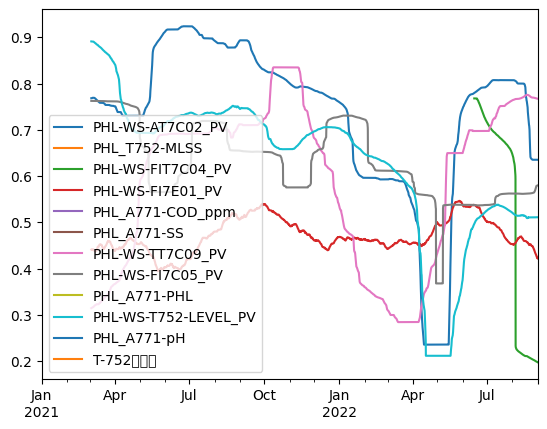

In [8]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import warnings 
warnings.filterwarnings('ignore')
ss = MinMaxScaler()
display(df.describe().loc['std'].sort_values(ascending=False))
temp_df = df[df.describe().loc['std'].sort_values(ascending=False)[:].index.tolist()]
#standscaler縮放
temp_df[:] = ss.fit_transform(temp_df[:])
#平滑化:平滑化滑動窗格SIZE暫時訂為資料筆數的10%
平滑化滑動窗格SIZE = int(len(temp_df)*0.10)
print('平滑化滑動窗格SIZE:',平滑化滑動窗格SIZE)
temp_df[:] = temp_df[:].rolling(平滑化滑動窗格SIZE).median()
#擷取一小段時間段出來[0%~100%]中選取[?%~?%]的資料
idx1 = int(len(temp_df)*0.0)
idx2 = int(len(temp_df)*1.0)
temp_df = temp_df.iloc[idx1:idx2]
display(temp_df.plot())

# 兩兩確認#1

<Axes: >

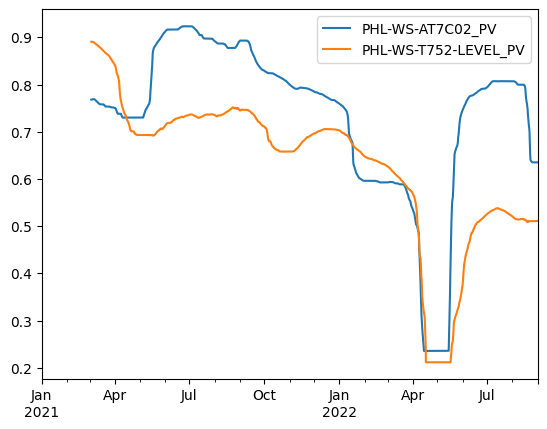

In [10]:
temp_df[['PHL-WS-AT7C02_PV','PHL-WS-T752-LEVEL_PV']].plot()

看起來沒有什麼延遲

<Axes: >

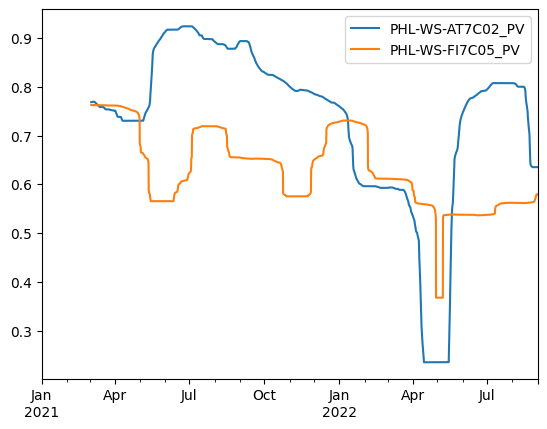

In [11]:
temp_df[['PHL-WS-AT7C02_PV','PHL-WS-FI7C05_PV']].plot()

In [21]:
var1 = temp_df.loc[(temp_df['PHL-WS-AT7C02_PV']<0.3)&(temp_df['PHL-WS-FI7C05_PV']>0.5),['PHL-WS-AT7C02_PV','PHL-WS-FI7C05_PV']].head(1)
var1

,PHL-WS-AT7C02_PV,PHL-WS-FI7C05_PV
2022-04-11 21:00:00,0.29993,0.559871


在2022-04-11 21:00:00	PHL-WS-AT7C02_PV降到0.3以下,PHL-WS-FI7C05_PV還是維持在0.55左右

In [22]:
var2 = temp_df.loc[(temp_df['PHL-WS-AT7C02_PV']<0.3)&(temp_df['PHL-WS-FI7C05_PV']<0.4),['PHL-WS-AT7C02_PV','PHL-WS-FI7C05_PV']].head(1)
var2

,PHL-WS-AT7C02_PV,PHL-WS-FI7C05_PV
2022-04-29 05:30:00,0.235602,0.377405


直到2022-04-29 05:30:00 PHL-WS-FI7C05_PV才跟著下降

In [23]:
var2.index - var1.index

TimedeltaIndex(['17 days 08:30:00'], dtype='timedelta64[ns]', freq=None)

上面做減法得到TimedeltaIndex(['17 days 08:30:00'] 17天又8小時半